In [13]:
from pyadjoint.utils.cctm import *
import pyadjoint
import obspy
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# read the waveform data
dat = obspy.read('../example_data/TA.A38.BXZ.sac.obs')[0]
syn = obspy.read('../example_data/TA.A38.BXZ.sac.syn')[0]

# filter
band = [5, 50]
dat.filter('bandpass', freqmin=1/band[1], freqmax=1/band[0], corners=2, zerophase=True)
syn.filter('bandpass', freqmin=1/band[1], freqmax=1/band[0], corners=2, zerophase=True)

time_win = np.array([42.844449, 91.120007]) - syn.stats.sac.b

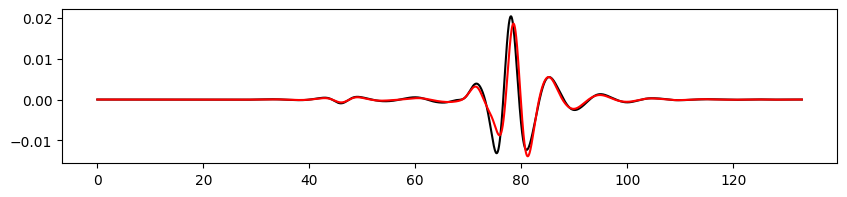

In [15]:
plt.figure(figsize=(10, 2))
plt.plot(dat.times(), dat.data, label='Observed', color='black')
plt.plot(syn.times(), syn.data, label='Synthetic', color='red')

In [16]:

# tshift, dlna, sigma_dt, sigma_dlna = calculate_cc_shift(dat_cp.data, syn_cp.data, dat_cp.stats.delta, dt_sigma_min=1.0, dlna_sigma_min=0.5)
config = pyadjoint.get_config(adjsrc_type="cc_traveltime",
                              min_period=5., max_period=50.,
                              taper_percentage=0.3, taper_type="hann", measure_type="dt")
adj_tt = pyadjoint.calculate_adjoint_source(config=config,
                                             observed=dat, synthetic=syn,
                                             windows=[time_win]
                                             )
config = pyadjoint.get_config(adjsrc_type="cc_traveltime",
                              min_period=5., max_period=50.,
                              taper_percentage=0.3, taper_type="hann", measure_type="am")
adj_am = pyadjoint.calculate_adjoint_source(config=config,
                                             observed=dat, synthetic=syn,
                                             windows=[time_win]
                                             )
print(adj_tt.misfit, adj_am.window_stats)
# print(
#     "CC error: "
#     f"dt={tshift:.2f}+/-{sigma_dt:.2f}s; "
#     f"dlna = {dlna:.3f}+/-{sigma_dlna:.3f}"
# )
# misfit_p, misfit_q, fp, fq = calculate_cc_adjsrc(syn_cp.data, tshift, dlna, syn_cp.stats.delta, sigma_dt, sigma_dlna)
# print(
#     f"dt_misfit={misfit_p:.5f}, dlna_misfit={misfit_q:.5f} "
# )

0.06125000000000001 [{'type': 'cc_traveltime', 'left': 52.84, 'right': 101.12, 'measurement_type': 'am', 'tshift': -0.35000000000000003, 'misfit_dt': 0.06125000000000001, 'sigma_dt': 1.0, 'dlna': 0.11055760678203128, 'misfit_dlna': 0.024445968834740497, 'sigma_dlna': 0.5}]


In [ ]:
!bin/xex_cc_misfit ../example_data/TA.A38.BXZ.sac.obs ../example_data/TA.A38.BXZ.sac.syn 5 50 42.844449 91.120007 11 ./
!bin/xex_cc_misfit ../example_data/TA.A38.BXZ.sac.obs ../example_data/TA.A38.BXZ.sac.syn 5 50 42.844449 91.120007 12 ./

Time shift (s): -0.35000+/- 1.00000
Time shift misfit:  0.06125
Amplitude anomaly (ln):  0.11057+/- 0.50000
Amplitude anomaly misfit:  0.02445


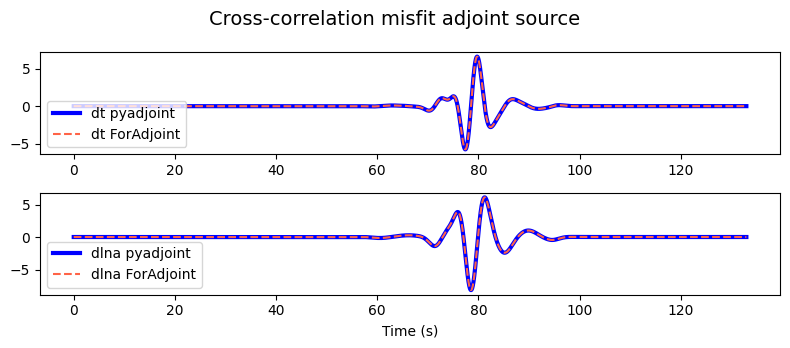

In [18]:
fpf = obspy.read('./TA.A38.BXZ.ccdt.sac')[0]
fqf = obspy.read('./TA.A38.BXZ.ccdlna.sac')[0]
plt.figure(figsize=(8, 3.5))
plt.subplot(211)
plt.plot(syn.times(), adj_tt.adjoint_source[::-1], label='dt pyadjoint', color='blue', lw=3)
plt.plot(fpf.times(), fpf.data, label='dt ForAdjoint', color='tomato', linestyle='--', lw=1.5)
plt.legend(loc='lower left')
plt.subplot(212)
plt.plot(syn.times(), adj_am.adjoint_source[::-1], label='dlna pyadjoint', color='blue', lw=3)
plt.plot(fqf.times(), fqf.data, label='dlna ForAdjoint', color='tomato', linestyle='--', lw=1.5)
plt.legend(loc='lower left')
plt.xlabel('Time (s)')
plt.suptitle('Cross-correlation misfit adjoint source', fontsize=14)
plt.tight_layout()
